# Chapter 3 - Exercise 15 - Boston dataset

This problem involves the Boston data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.

In [12]:
import pandas as pd
import numpy as np 
import statsmodels.api as sm
from ISLP.models import ModelSpec as MS
from ISLP.models import poly, summarize

import warnings
warnings.filterwarnings('ignore')

In [5]:
from ISLP import load_data
Boston = load_data('Boston')
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [8]:
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


[The Boston dataset](https://islp.readthedocs.io/en/latest/datasets/Boston.html) is a data set containing housing values in 506 suburbs of Boston.

- **crim**: per capita crime rate by town.
- **zn**: proportion of residential land zoned for lots over 25,000 sq.ft.
- **indus**: proportion of non-retail business acres per town.
- **chas**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- **nox**: nitrogen oxides concentration (parts per 10 million).
- **rm**: average number of rooms per dwelling.
- **age**: proportion of owner-occupied units built prior to 1940.
- **dis**: weighted mean of distances to five Boston employment centres.
- **rad**: index of accessibility to radial highways.
- **tax**: full-value property-tax rate per USD 10,000.
- **ptratio**: pupil-teacher ratio by town.
- **lstat**: lower status of the population (percent).
- **medv**: median value of owner-occupied homes in $1000s.

(a) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

In [23]:
type(summarize(results)['coef'])
print(pd. __version__)

2.2.2


In [39]:
cols = ['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv']

coefs = pd.Series()

for col in cols:
    print(f'-------------- {str.upper(col)} --------------------')
    X = MS([col]).fit_transform(Boston)
    
    model = sm.OLS(Boston['crim'], X)
    results = model.fit()

    print(results.summary())
    coefs = pd.concat([coefs, summarize(results)['coef']])

-------------- ZN --------------------
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Wed, 12 Jun 2024   Prob (F-statistic):           5.51e-06
Time:                        10:51:09   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    

Everything but the predictor 'chas' seem to be interesting to be included on a model, based on the single variable regressions performed.

In [40]:
coefs_a = coefs[coefs.index != 'intercept']

(b) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

In [41]:
X = MS(Boston.columns.drop('crim')).fit_transform(Boston)

model = sm.OLS(Boston['crim'], X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Wed, 12 Jun 2024   Prob (F-statistic):           2.03e-56
Time:                        10:51:11   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.7784      7.082      1.946      0.0

In [42]:
coefs = summarize(results)['coef']
coefs_b = coefs[coefs.index != 'intercept']

Performing a regression with every single predictor shows that many of them dont have enough evidence to defend a not null relationship between predictor and response. Indus, chas, rm, age, tax and even ptratio could be dropped based on this last performed regression

(c) How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.
    
    np.concatenate()
    x1 = np.concatenate([x1, [0.1]]) 
    x2 = np.concatenate([x2, [0.8]]) 
    y = np.concatenate([y, [6]])
   

In [45]:
coefs_a

zn         -0.0739
indus       0.5098
chas       -1.8928
nox        31.2485
rm         -2.6841
age         0.1078
dis        -1.5509
rad         0.6179
tax         0.0297
ptratio     1.1520
lstat       0.5488
medv       -0.3632
dtype: float64

In [43]:
coefs_b

zn         0.0457
indus     -0.0584
chas      -0.8254
nox       -9.9576
rm         0.6289
age       -0.0008
dis       -1.0122
rad        0.6125
tax       -0.0038
ptratio   -0.3041
lstat      0.1388
medv      -0.2201
Name: coef, dtype: float64

<Axes: xlabel='None', ylabel='coef'>

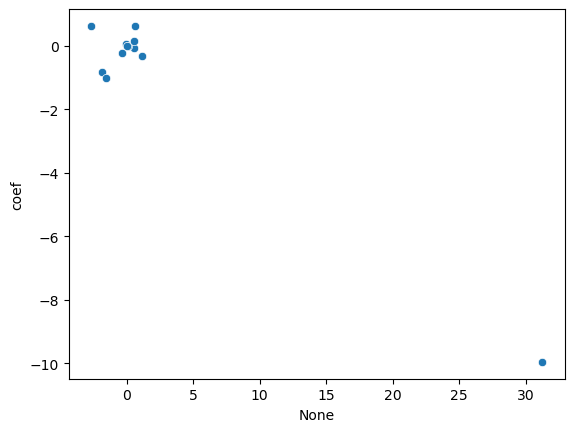

In [47]:
import seaborn as sns
sns.scatterplot(x=coefs_a, y=coefs_b)

(d) Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form
Y =β0 +β1X+β2X2 +β3X3 +ε.

In [49]:
cols = ['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv']

coefs = pd.Series()

for col in cols:
    print(f'-------------- {str.upper(col)} --------------------')
    X = MS([poly(col, degree=3)]).fit_transform(Boston)
    
    model = sm.OLS(Boston['crim'], X)
    results = model.fit()

    print(results.summary())


-------------- ZN --------------------
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Wed, 12 Jun 2024   Prob (F-statistic):           1.28e-06
Time:                        10:54:16   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

For some of the regressions performed, the R^2 reaches 0.4 with a p_value for the coefficients of the 2 and 3 power very low. The case of 'medv' is pretty clear for the powers 2 and 3. For 'rad' the power 2 seems relevant too.
There are deffinetely some p-values for some non linear coefficients that proof there is a bit of non linearity in the association between the response and some predictors.